<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверим,-что-эффективность-обогащения-рассчитана-правильно." data-toc-modified-id="Проверим,-что-эффективность-обогащения-рассчитана-правильно.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Проверим, что эффективность обогащения рассчитана правильно.</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Проверим,-какие-признаки-не-доступны-в-тестовой-выборке." data-toc-modified-id="Проверим,-какие-признаки-не-доступны-в-тестовой-выборке.-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проверим, какие признаки не доступны в тестовой выборке.</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Определим-концентрацию-металлов-на-разных-этапах-очистки" data-toc-modified-id="Определим-концентрацию-металлов-на-разных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Определим концентрацию металлов на разных этапах очистки</a></span></li><li><span><a href="#Сравнение-размера-гранул-сырья-на-обучающей-и-тестовой-выборке" data-toc-modified-id="Сравнение-размера-гранул-сырья-на-обучающей-и-тестовой-выборке-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение размера гранул сырья на обучающей и тестовой выборке</a></span></li><li><span><a href="#Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях" data-toc-modified-id="Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарной концентрации всех веществ на разных стадиях</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Сравним-результаты-с-константной-моделью" data-toc-modified-id="Сравним-результаты-с-константной-моделью-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Сравним результаты с константной моделью</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Необходимо подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain #подглядел на stackowerflow хитрый способ "распаковки" списка списков
from sklearn.metrics import (mean_absolute_error,
                             make_scorer)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor


import warnings
warnings.filterwarnings("ignore")

RANDOM = 42

In [2]:
try:
    gold_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
    gold_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
    gold_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
except:
    gold_train = pd.read_csv('gold_recovery_train_new.csv')
    gold_test = pd.read_csv('gold_recovery_test_new.csv')
    gold_full = pd.read_csv('gold_recovery_full_new.csv')

In [3]:
print('Тренировочный набор данных:')
display(gold_train.head())
print('Тестовый набор данных:')
display(gold_test.head())
print('Полный набор данных:')
display(gold_full.head())

Тренировочный набор данных:


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Тестовый набор данных:


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


Полный набор данных:


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
print('Тренировочный набор данных:')
display(gold_train.info())
print('Тестовый набор данных:')
display(gold_test.info())
print('Полный набор данных:')
display(gold_full.info())
#Достаточно объемный наборы данных. Видно, что формат столбца date не соответствует содержанию. Нужно будет поправить.

Тренировочный набор данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                           

None

Тестовый набор данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   fl

None

Полный набор данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               194

None

In [5]:
print('Тренировочный набор данных:')
display(gold_train
            .isna()
            .mean()
            .sort_values(ascending = False)*100)
print('Тестовый набор данных:')
display(gold_test
            .isna()
            .mean()
            .sort_values(ascending = False)*100)
print('Полный набор данных:')
display(gold_full
            .isna()
            .mean()
            .sort_values(ascending = False)*100)
#В данных есть пропуски. Не много, но есть. Подумаем потом, что с ними делать.

Тренировочный набор данных:


secondary_cleaner.output.tail_sol           11.343558
rougher.state.floatbank10_e_air              3.081490
rougher.input.floatbank11_xanthate           3.024949
primary_cleaner.output.concentrate_sol       2.021344
secondary_cleaner.state.floatbank2_a_air     1.533677
                                              ...    
rougher.output.concentrate_pb                0.000000
rougher.output.concentrate_au                0.000000
rougher.output.recovery                      0.000000
rougher.output.tail_pb                       0.000000
date                                         0.000000
Length: 87, dtype: float64

Тестовый набор данных:


rougher.input.floatbank11_xanthate            0.472590
rougher.input.feed_sol                        0.396975
secondary_cleaner.state.floatbank3_a_air      0.170132
rougher.input.floatbank11_sulfate             0.151229
primary_cleaner.input.depressant              0.094518
rougher.input.floatbank10_sulfate             0.094518
primary_cleaner.input.xanthate                0.075614
primary_cleaner.input.sulfate                 0.075614
rougher.input.feed_rate                       0.056711
secondary_cleaner.state.floatbank2_a_air      0.056711
secondary_cleaner.state.floatbank2_b_air      0.037807
rougher.input.feed_size                       0.018904
secondary_cleaner.state.floatbank2_b_level    0.000000
rougher.state.floatbank10_f_level             0.000000
rougher.state.floatbank10_f_air               0.000000
secondary_cleaner.state.floatbank3_a_level    0.000000
secondary_cleaner.state.floatbank2_a_level    0.000000
date                                          0.000000
rougher.st

Полный набор данных:


secondary_cleaner.output.tail_sol           8.992232
rougher.input.floatbank11_xanthate          2.330367
rougher.state.floatbank10_e_air             2.242914
primary_cleaner.output.concentrate_sol      1.903390
secondary_cleaner.state.floatbank2_a_air    1.131745
                                              ...   
rougher.state.floatbank10_d_level           0.000000
rougher.state.floatbank10_d_air             0.000000
rougher.output.tail_pb                      0.000000
rougher.output.tail_sol                     0.000000
date                                        0.000000
Length: 87, dtype: float64

### Проверим, что эффективность обогащения рассчитана правильно.

Формула для расчета Recovery: 
 
$$ \cfrac{C*(F-T)}{F*(C-T)} * 100% $$
 
где:

C — доля золота в концентрате после флотации/очистки 

F — доля золота в сырье/концентрате до флотации/очистки 

T — доля золота в отвальных хвостах после флотации/очистки 

In [6]:
С = gold_train['rougher.output.concentrate_au']
F = gold_train['rougher.input.feed_au']
T = gold_train['rougher.output.tail_au']

In [7]:
recovery_calc = (С * (F - T))/(F * (С - T)) * 100
recovery_calc.mean()

82.70450164550293

In [8]:
gold_train['rougher.output.recovery'].mean()
#Расчет правильный. Расчитаем MAE

82.70450164550293

In [9]:
MAE = mean_absolute_error(gold_train['rougher.output.recovery'], recovery_calc)
MAE
#Значение MAE очень мало. Значит эффективность обогащения расчитана верно.

9.73512347450521e-15

### Вывод
MAE очень мало (10^-15). Это значит, что эффективность обогащения расчитана правильно.

### Проверим, какие признаки не доступны в тестовой выборке.

In [10]:
#Поулчим список столбцов, отсутствующих в тестовом наборе
difference = sorted(gold_train.columns.difference(gold_test.columns))
difference

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

В тестовом наборе данных отсутствуют данные, касающиеся параметров продукта на всех стадиях получения золота. Также стоит заметить, что в тестовом наборе отсутствуют целевые переменные.
Взглянем подробнее.

In [11]:
#Разобьем название каждого столбца на отдельные слова по разделителю "."
diff = [i.split('.') for i in difference]
#Переделаем в Series, чтобы использовать value_counts() и посчитаем уникальные элементы
pd.Series(list(chain(*diff))).value_counts()

output                            30
rougher                           13
final                              9
primary_cleaner                    8
tail_pb                            4
secondary_cleaner                  4
calculation                        4
tail_ag                            4
tail_au                            4
tail_sol                           4
concentrate_sol                    3
concentrate_ag                     3
concentrate_pb                     3
concentrate_au                     3
recovery                           2
au_pb_ratio                        1
floatbank10_sulfate_to_au_feed     1
sulfate_to_au_concentrate          1
floatbank11_sulfate_to_au_feed     1
dtype: int64

* 13 отсутствующих признаков касаются процесса флотации
* 8 признаков касаются первичной очистки
* 4 признака качаются вторично очистки
* 9 признаков касаются финальных характеристик


### Предобработка данных

In [12]:
#Изменим формат столбца date
gold_train['date'] = pd.to_datetime(gold_train['date'], format='%Y-%m-%d %H:%M:%S')
gold_test['date'] = pd.to_datetime(gold_test['date'], format='%Y-%m-%d %H:%M:%S')
gold_full['date'] = pd.to_datetime(gold_full['date'], format='%Y-%m-%d %H:%M:%S')

In [13]:
#Так как в условиях задачи сказано, что соседние по времени параметры часто похожи, 
#то заменим пропуски предыдущим значением в столбце. Пропусков не так много, на результат это повлиять не должно
gold_train = gold_train.fillna(method='ffill')
gold_test = gold_test.fillna(method='ffill')
gold_full = gold_full.fillna(method='ffill')

In [14]:
#Проверка
print('Тренировочный набор данных:')
display(gold_train
            .isna()
            .mean()
            .sort_values(ascending = False)*100)
print('Тестовый набор данных:')
display(gold_test
            .isna()
            .mean()
            .sort_values(ascending = False)*100)
print('Полный набор данных:')
display(gold_full
            .isna()
            .mean()
            .sort_values(ascending = False)*100)
#Ура!

Тренировочный набор данных:


date                                          0.0
rougher.state.floatbank10_b_air               0.0
rougher.state.floatbank10_f_air               0.0
rougher.state.floatbank10_e_level             0.0
rougher.state.floatbank10_e_air               0.0
                                             ... 
primary_cleaner.state.floatbank8_c_level      0.0
primary_cleaner.state.floatbank8_c_air        0.0
primary_cleaner.state.floatbank8_b_level      0.0
primary_cleaner.state.floatbank8_b_air        0.0
secondary_cleaner.state.floatbank6_a_level    0.0
Length: 87, dtype: float64

Тестовый набор данных:


date                                          0.0
rougher.state.floatbank10_c_air               0.0
rougher.state.floatbank10_d_air               0.0
rougher.state.floatbank10_d_level             0.0
rougher.state.floatbank10_e_air               0.0
rougher.state.floatbank10_e_level             0.0
rougher.state.floatbank10_f_air               0.0
rougher.state.floatbank10_f_level             0.0
secondary_cleaner.state.floatbank2_a_air      0.0
secondary_cleaner.state.floatbank2_a_level    0.0
secondary_cleaner.state.floatbank2_b_air      0.0
secondary_cleaner.state.floatbank2_b_level    0.0
secondary_cleaner.state.floatbank3_a_air      0.0
secondary_cleaner.state.floatbank3_a_level    0.0
secondary_cleaner.state.floatbank3_b_air      0.0
secondary_cleaner.state.floatbank3_b_level    0.0
secondary_cleaner.state.floatbank4_a_air      0.0
secondary_cleaner.state.floatbank4_a_level    0.0
secondary_cleaner.state.floatbank4_b_air      0.0
secondary_cleaner.state.floatbank4_b_level    0.0


Полный набор данных:


date                                          0.0
rougher.state.floatbank10_b_air               0.0
rougher.state.floatbank10_f_air               0.0
rougher.state.floatbank10_e_level             0.0
rougher.state.floatbank10_e_air               0.0
                                             ... 
primary_cleaner.state.floatbank8_c_level      0.0
primary_cleaner.state.floatbank8_c_air        0.0
primary_cleaner.state.floatbank8_b_level      0.0
primary_cleaner.state.floatbank8_b_air        0.0
secondary_cleaner.state.floatbank6_a_level    0.0
Length: 87, dtype: float64

In [15]:
#В тестовом наборе данных отсутствуют целевые переменные. Попробуем вытащить их по переменной Date
test_target = gold_test.merge(gold_full.loc[:,['date',"rougher.output.recovery","final.output.recovery"]],on = 'date')
#Проверим есть ли пропуски в том, что присоединили
test_target.isna().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

## Анализ данных

### Определим концентрацию металлов на разных этапах очистки

In [16]:
def get_diagramm(metal):
    fig, ax = plt.subplots(3, 1, figsize=(20, 20))
    for i in range(0, len(metal)):
        if metal[i] == 'au':
            pa_russki = 'золота'
        elif metal[i] == 'ag':
            pa_russki = 'серебра'
        else:
            pa_russki = 'свинца'
        for process in ['rougher.input.feed_', 'rougher.output.concentrate_', 
                    'primary_cleaner.output.concentrate_', 'final.output.concentrate_']:
            col = process + metal[i]
            gold_full[col].plot(
                title = f'Изменение концентрации {pa_russki} на разных этапах очистки.',
                kind='hist', 
                bins=200,
                ax=ax[i],
                grid=True, 
                legend=True,
                alpha=0.5).set(xlabel='Концентрация')

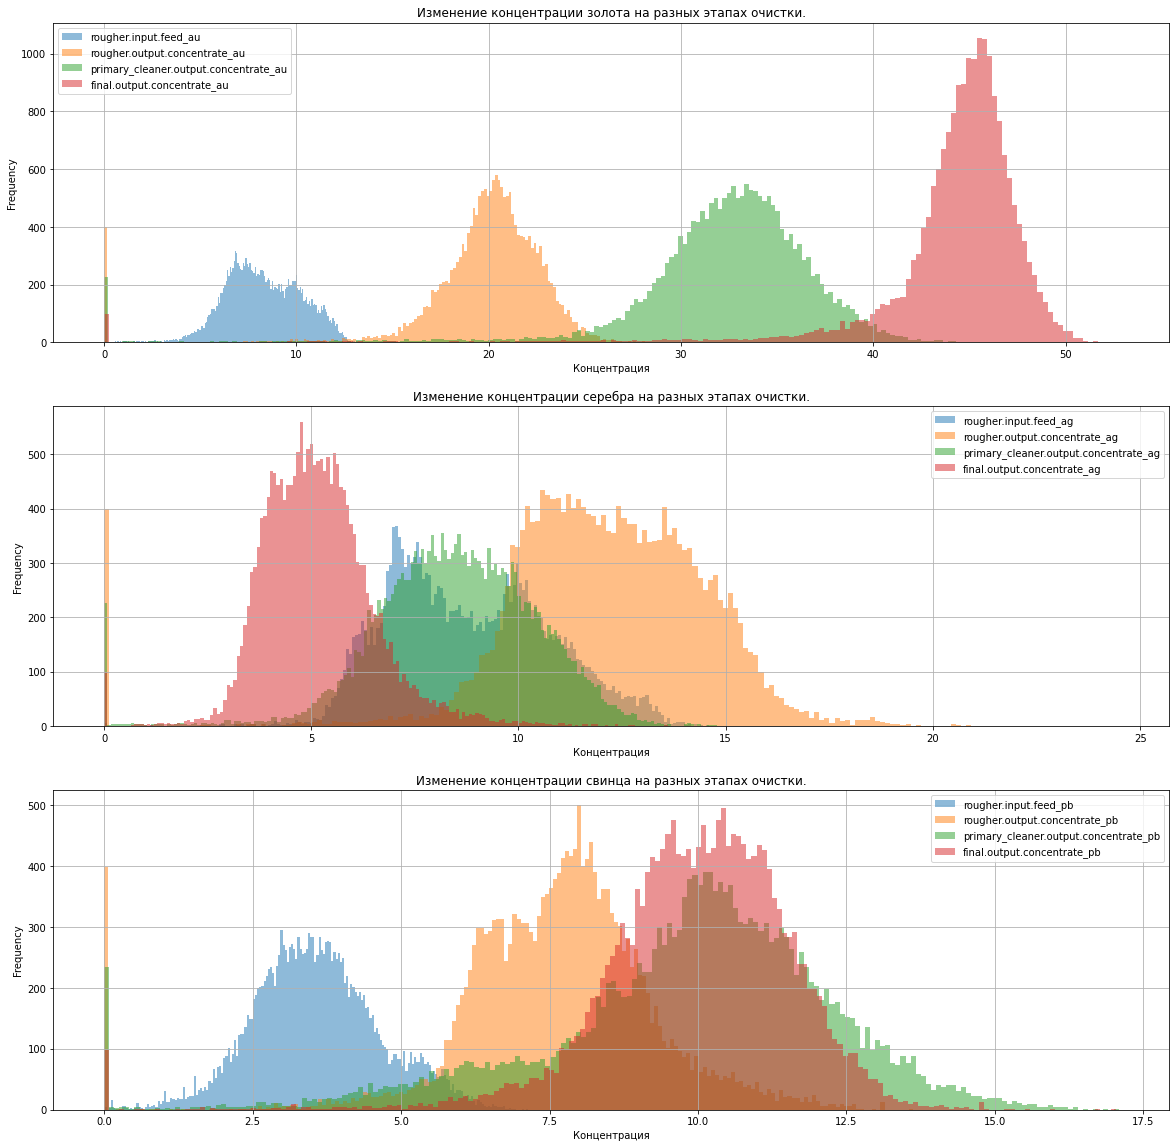

In [17]:
get_diagramm(['au', 'ag', 'pb'])

* На графиках видно, что концентрация золота значительно увеличивается от процесса к процессу.
* Концентрация серебра возрастает после флотации, но после вторичной очистки заметно снижается.
* Концентрация свинца возрастает в течение всего процесса, и не меняется после первичной очистки.

* Также видны аномально низкие значения в районе 0. Позже их отбросим.

In [18]:
#Определим среднюю концентрацию металлов после каждого их этапов очистки:
for process in ['rougher.input.feed_', 'rougher.output.concentrate_', 
                    'primary_cleaner.output.concentrate_', 'final.output.concentrate_']:
    if process == 'rougher.input.feed_':
        title = 'Исходная концентрация металлов:'
    elif process == 'rougher.output.concentrate_':
        title = 'Концентрация металлов после флотации:'
    elif 'primary' in process:
        title = 'Концентрация металлов после первичной очистки:'
    else:
        title = 'Концентрация металлов после вторичной очистки:'
    au = round(gold_full[process + 'au'].mean(), 2)
    ag = round(gold_full[process + 'ag'].mean(), 2)
    pb = round(gold_full[process + 'pb'].mean(), 2)
    print(title)
    print(f'Золото: {au}%, Серебро: {ag}%, Свинец: {pb}%')
    print('---------------------')
    

Исходная концентрация металлов:
Золото: 8.27%, Серебро: 8.79%, Свинец: 3.59%
---------------------
Концентрация металлов после флотации:
Золото: 19.77%, Серебро: 11.99%, Свинец: 7.61%
---------------------
Концентрация металлов после первичной очистки:
Золото: 32.12%, Серебро: 8.44%, Свинец: 9.81%
---------------------
Концентрация металлов после вторичной очистки:
Золото: 44.08%, Серебро: 5.17%, Свинец: 9.98%
---------------------


### Сравнение размера гранул сырья на обучающей и тестовой выборке

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Сравнение размера гранул в выборках')

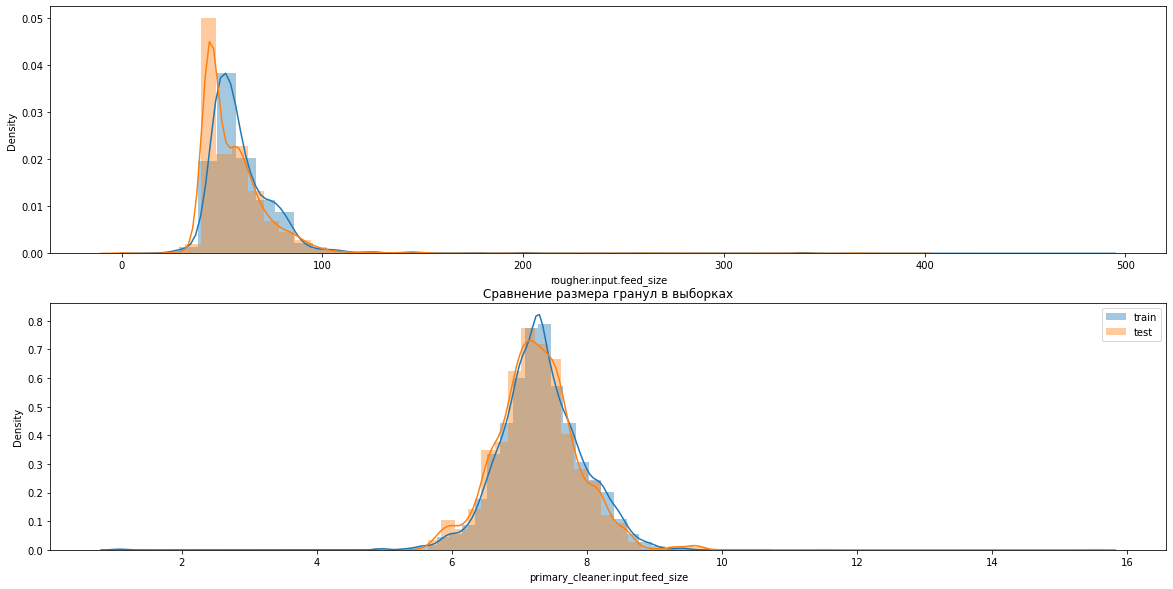

In [19]:
#'primary_cleaner.input.feed_size'
#'rougher.input.feed_size'
fig, ax = plt.subplots(2, 1,  figsize=(20, 10))
sns.distplot(gold_train['rougher.input.feed_size'], ax = ax[0], 
                 label = 'train')
sns.distplot(gold_test['rougher.input.feed_size'], ax = ax[0],  
                 label = 'test')
plt.legend()
plt.title('Сравнение размера гранул в выборках')

sns.distplot(gold_train['primary_cleaner.input.feed_size'], ax = ax[1],  
                 label = 'train')
sns.distplot(gold_test['primary_cleaner.input.feed_size'], ax = ax[1],  
                 label = 'test')
plt.legend()
plt.title('Сравнение размера гранул в выборках')

* Размеры гранул в треноровочной и тестовой выборке практически не отличаются. Это хорошо, тк модели будет проще обучаться.

### Исследование суммарной концентрации всех веществ на разных стадиях

In [20]:
gold_full['rougher.input.feed_sum'] = gold_full['rougher.input.feed_au'] + gold_full['rougher.input.feed_ag'] + gold_full['rougher.input.feed_pb']
gold_full['rougher.output.concentrate_sum'] = gold_full['rougher.output.concentrate_au'] + gold_full['rougher.output.concentrate_ag'] + gold_full['rougher.output.concentrate_pb']
gold_full['primary_cleaner.output.concentrate_sum'] = gold_full['primary_cleaner.output.concentrate_au'] + gold_full['primary_cleaner.output.concentrate_ag'] + gold_full['primary_cleaner.output.concentrate_pb']
gold_full['final.output.concentrate_sum'] = gold_full['final.output.concentrate_au'] + gold_full['final.output.concentrate_ag'] + gold_full['final.output.concentrate_pb']

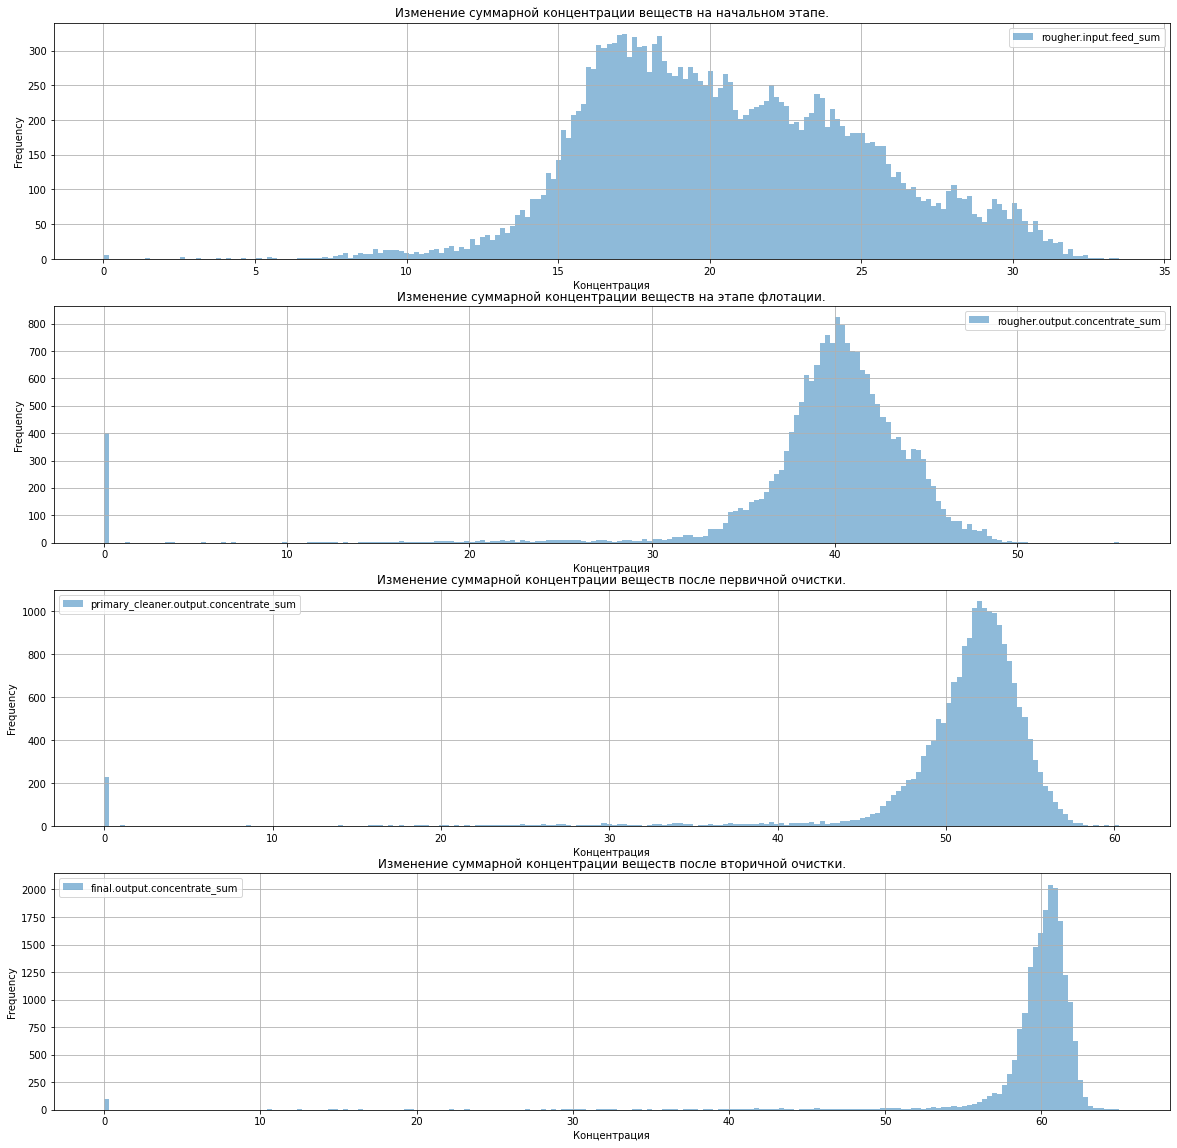

In [21]:
fig, ax = plt.subplots(4, 1, figsize=(20, 20))
i=0
for col in ['rougher.input.feed_sum', 'rougher.output.concentrate_sum', 
          'primary_cleaner.output.concentrate_sum', 'final.output.concentrate_sum']:
    if col == 'rougher.input.feed_sum':
        process = 'на начальном этапе'
    elif col == 'rougher.output.concentrate_sum':
        process = 'на этапе флотации'
    elif col == 'primary_cleaner.output.concentrate_sum':
        process = 'после первичной очистки'
    else:
        process = 'после вторичной очистки'
    gold_full[col].plot(
        title = f'Изменение суммарной концентрации веществ {process}.',
        kind='hist', 
        bins=200,
        ax=ax[i],
        grid=True, 
        legend=True,
        alpha=0.5).set(xlabel='Концентрация')
    i = i+1

In [22]:
#Напишем функцию, чтобы отбросить аномальные значения в тестовом наборе данных и обуччающей выборке
def get_clean_data(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    clean = data.loc[(data[col]  < q3 + 1.5*iqr) & (data[col]  > q1 - 1.5*iqr)]
    return clean

In [67]:
for col in ['rougher.input.feed_ag', 'rougher.input.feed_au', 'rougher.input.feed_pb', 
          'rougher.output.concentrate_ag', 'rougher.output.concentrate_au', 'rougher.output.concentrate_pb', 
          'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_pb',
          'final.output.concentrate_ag', 'final.output.concentrate_au', 'final.output.concentrate_pb']:
    if col in gold_test.columns:
        test_target = get_clean_data(test_target, col)
    else:
        continue
    
for col in ['rougher.input.feed_ag', 'rougher.input.feed_au', 'rougher.input.feed_pb', 
          'rougher.output.concentrate_ag', 'rougher.output.concentrate_au', 'rougher.output.concentrate_pb', 
          'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_pb',
          'final.output.concentrate_ag', 'final.output.concentrate_au', 'final.output.concentrate_pb']:
    if col in gold_train.columns:
        gold_train = get_clean_data(gold_train, col)
    else:
        continue
    

## Модель

In [24]:
#Формула расчета sMAPE
def sMAPE(true, predict):
    a = (abs(true - predict)/((abs(true) + abs(predict))*0.5))*100
    return a.mean()

In [25]:
def final_smape(smape_rougher, smape_final):
    final_smape = 0.25*smape_rougher + 0.75*smape_final
    return final_smape

In [26]:
#Так как метрикой качества является sMAPE, то зададим scorer для GridSearch
smape_score =  make_scorer(sMAPE, greater_is_better=False)

In [27]:
#Отбросим колонку с датой. Не думаю, что она пригодится далее.
features_train = gold_train.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis = 1)
target_train = gold_train[['rougher.output.recovery', 'final.output.recovery']]

In [28]:
#Отбросим колонки в features, которых нет в тестовом наборе
difference_1 = sorted(features_train.columns.difference(gold_test.columns))
features_train = features_train.drop(difference_1, axis='columns')

Ячейки ниже тоже пришлось отключить, тк вместо масштабированного датафрейма, scaler.transform возвращал np.array

In [29]:
#Приведем численные признаки ки одному масштабу. Обучим scaler на тренировочном наборе
#numeric = features_train.columns
#scaler.fit(features_train[numeric])
#scaler.transform(features_train[numeric])

In [30]:
#Проверим модели случайного леса и дерева решений
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

In [31]:
dt_params = { 'max_depth': range (1, 50, 2)}

rf_params = { 'n_estimators': range (1, 10, 2),
              'max_depth': range (1,10, 2) }

In [32]:
#решающее дерево
dt_grid_rougher = GridSearchCV(dt, dt_params, scoring = smape_score, verbose=10  )
dt_grid_rougher.fit(features_train, target_train['rougher.output.recovery'])
display(dt_grid_rougher.best_params_)

dt_grid_final = GridSearchCV(dt, dt_params, scoring = smape_score, verbose=10  )
dt_grid_final.fit(features_train, target_train['final.output.recovery'])
display(dt_grid_final.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5; 1/25] START max_depth=1................................................
[CV 1/5; 1/25] END ..............................max_depth=1; total time=   0.2s
[CV 2/5; 1/25] START max_depth=1................................................
[CV 2/5; 1/25] END ..............................max_depth=1; total time=   0.1s
[CV 3/5; 1/25] START max_depth=1................................................
[CV 3/5; 1/25] END ..............................max_depth=1; total time=   0.1s
[CV 4/5; 1/25] START max_depth=1................................................
[CV 4/5; 1/25] END ..............................max_depth=1; total time=   0.1s
[CV 5/5; 1/25] START max_depth=1................................................
[CV 5/5; 1/25] END ..............................max_depth=1; total time=   0.1s
[CV 1/5; 2/25] START max_depth=3................................................
[CV 1/5; 2/25] END ............................

{'max_depth': 7}

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5; 1/25] START max_depth=1................................................
[CV 1/5; 1/25] END ..............................max_depth=1; total time=   0.1s
[CV 2/5; 1/25] START max_depth=1................................................
[CV 2/5; 1/25] END ..............................max_depth=1; total time=   0.0s
[CV 3/5; 1/25] START max_depth=1................................................
[CV 3/5; 1/25] END ..............................max_depth=1; total time=   0.1s
[CV 4/5; 1/25] START max_depth=1................................................
[CV 4/5; 1/25] END ..............................max_depth=1; total time=   0.1s
[CV 5/5; 1/25] START max_depth=1................................................
[CV 5/5; 1/25] END ..............................max_depth=1; total time=   0.1s
[CV 1/5; 2/25] START max_depth=3................................................
[CV 1/5; 2/25] END ............................

{'max_depth': 1}

In [33]:
#случайный лес
rf_grid_rougher = GridSearchCV(rf, rf_params, scoring = smape_score,  verbose=10 )
rf_grid_rougher.fit(features_train, target_train['rougher.output.recovery'])
display(rf_grid_rougher.best_params_)

rf_grid_final = GridSearchCV(rf, rf_params, scoring = smape_score,  verbose=10 )
rf_grid_final.fit(features_train, target_train['final.output.recovery'])
display(rf_grid_final.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5; 1/25] START max_depth=1, n_estimators=1................................
[CV 1/5; 1/25] END ..............max_depth=1, n_estimators=1; total time=   0.1s
[CV 2/5; 1/25] START max_depth=1, n_estimators=1................................
[CV 2/5; 1/25] END ..............max_depth=1, n_estimators=1; total time=   0.1s
[CV 3/5; 1/25] START max_depth=1, n_estimators=1................................
[CV 3/5; 1/25] END ..............max_depth=1, n_estimators=1; total time=   0.1s
[CV 4/5; 1/25] START max_depth=1, n_estimators=1................................
[CV 4/5; 1/25] END ..............max_depth=1, n_estimators=1; total time=   0.0s
[CV 5/5; 1/25] START max_depth=1, n_estimators=1................................
[CV 5/5; 1/25] END ..............max_depth=1, n_estimators=1; total time=   0.0s
[CV 1/5; 2/25] START max_depth=1, n_estimators=3................................
[CV 1/5; 2/25] END ..............max_depth=1, n

{'max_depth': 9, 'n_estimators': 9}

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5; 1/25] START max_depth=1, n_estimators=1................................
[CV 1/5; 1/25] END ..............max_depth=1, n_estimators=1; total time=   0.0s
[CV 2/5; 1/25] START max_depth=1, n_estimators=1................................
[CV 2/5; 1/25] END ..............max_depth=1, n_estimators=1; total time=   0.0s
[CV 3/5; 1/25] START max_depth=1, n_estimators=1................................
[CV 3/5; 1/25] END ..............max_depth=1, n_estimators=1; total time=   0.0s
[CV 4/5; 1/25] START max_depth=1, n_estimators=1................................
[CV 4/5; 1/25] END ..............max_depth=1, n_estimators=1; total time=   0.0s
[CV 5/5; 1/25] START max_depth=1, n_estimators=1................................
[CV 5/5; 1/25] END ..............max_depth=1, n_estimators=1; total time=   0.0s
[CV 1/5; 2/25] START max_depth=1, n_estimators=3................................
[CV 1/5; 2/25] END ..............max_depth=1, n

{'max_depth': 1, 'n_estimators': 3}

In [34]:
print('Лучшие гиперпараметры для моделей:')
print('Случайный лес:')
print(rf_grid_rougher.best_estimator_)
print(rf_grid_final.best_estimator_)
print('-------------')
print('Решающее дерево:')
print(dt_grid_rougher.best_estimator_)
print(dt_grid_final.best_estimator_)

Лучшие гиперпараметры для моделей:
Случайный лес:
RandomForestRegressor(max_depth=9, n_estimators=9)
RandomForestRegressor(max_depth=1, n_estimators=3)
-------------
Решающее дерево:
DecisionTreeRegressor(max_depth=7)
DecisionTreeRegressor(max_depth=1)


In [35]:
smape_rougher_rf = rf_grid_rougher.best_score_
smape_final_rf = rf_grid_final.best_score_

smape_rougher_dt = dt_grid_rougher.best_score_
smape_final_dt = dt_grid_final.best_score_

In [36]:
print("rougher")
print("Решающее дерево:", smape_rougher_dt,"Случайный лес:", smape_rougher_rf)
print('----------------------------')
print("final")
print("Решающее дерево:", smape_final_dt,"Случайный лес:", smape_final_rf)

rougher
Решающее дерево: -6.954811094249631 Случайный лес: -6.275044015721271
----------------------------
final
Решающее дерево: -8.364138872849848 Случайный лес: -8.313442275917058


In [37]:
#Случайный лес
final_smape(smape_rougher_rf, smape_final_rf)

-7.803842710868111

In [38]:
#Решающее дерево
final_smape(smape_rougher_dt, smape_final_dt)

-8.011806928199793

Не похоже на правдоподобные результаты, хотябы потому, что я не использовал `StandartScaler()`

In [68]:
#Получим предсказания для теста
test_rougher = rf_grid_rougher.predict(gold_test.loc[:, gold_test.columns != 'date'])
test_final = rf_grid_final.predict(gold_test.loc[:, gold_test.columns != 'date'])

In [69]:
final_smape(sMAPE(test_target['rougher.output.recovery'],test_rougher),sMAPE(test_target['final.output.recovery'],test_final))

8.730762508153223

### Сравним результаты с константной моделью

In [70]:
#Выберем стратегию предсказания - медиану
dummy_rougher_mdl = DummyRegressor(strategy="median")
dummy_final_mdl = DummyRegressor(strategy="median")

In [71]:
dummy_rougher_mdl.fit(features_train, target_train['rougher.output.recovery'])
dummy_final_mdl.fit(features_train, target_train['final.output.recovery'])

DummyRegressor(strategy='median')

In [72]:
dummy_rougher = dummy_rougher_mdl.predict(gold_test.loc[:, gold_test.columns != 'date'])
dummy_final = dummy_final_mdl.predict(gold_test.loc[:, gold_test.columns != 'date'])

In [73]:
final_smape(sMAPE(test_target['rougher.output.recovery'],dummy_rougher),sMAPE(test_target['final.output.recovery'],dummy_final))

8.981563153496168

### Вывод
sMAPE на dummy - модели ниже, чем на тестовой выборке. Значит результат на тесте - приемлимый.

# Выводы
Проведена предобработка данных. Проверена правильность расчета обогощения. Обработаны пропуски.

Обнаружено, что в тестовом наборе данных отутствуют целевые переменные. Вернули их из полного набора данных методом Merge по переменной `date`.

Лучшей моделью для предсказания коэффициента восстановления золота оказалась - `RandomForestRegressor()`. **sMAPE** на тестовом наборе данных составил 8,7. На константной модели sMAPE - 8.9.

В любом случае - спасибо за ревью!